# 4TIN811U Machine Learning & Deep Learning
# TP 6 - Multi armed bandits

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Code pour génerer une instance aléatoire du Multi armed bandit avec "k_arm" bras, puis le simuler pendant "time" étapes et faire la moyenne sur "runs" runs

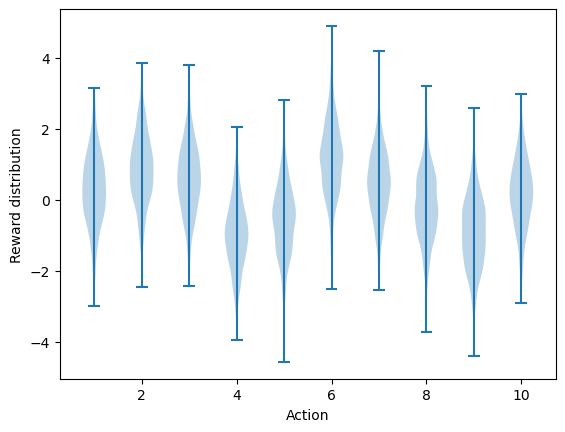

In [3]:
def generate_instance(k_arm):
    # reward for each action
    q_true = np.random.randn(k_arm)
    best_action = np.argmax(q_true) 
    return q_true, best_action

def execute_action(q_true, action):
    # generate the reward under using a Gaussian distribution centered around the reward with standard deviation 1
    return q_true[action] + np.random.randn()

def simulate(bandits, k_arm, runs, time):
    best_action_counts = np.zeros((len(bandits), runs, time))
    rewards = np.zeros((len(bandits), runs, time))
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            q_true, best_action = generate_instance(k_arm)
            for t in range(time):
                action = bandit.choose_action()
                reward = execute_action(q_true, action)
                bandit.update(action, reward)
                rewards[i, r, t] = reward
                if action == best_action:
                    best_action_counts[i, r, t] = 1
    # averaging over all runs
    best_action_counts = best_action_counts.mean(axis=1)
    rewards = rewards.mean(axis=1)
    return best_action_counts, rewards

k_arm = 10
runs = 2000
time = 1000

plt.violinplot(dataset=np.random.randn(time,k_arm) + np.random.randn(k_arm))
plt.xlabel("Action")
plt.ylabel("Reward distribution")
plt.show()

La classe EpsilonGreedy implémente la stratégie epsilon-greedy

In [4]:
class EpsilonGreedy:
    def __init__(self, k_arm, epsilon = 0.1):
        self.k_arm = k_arm
        self.epsilon = epsilon
        self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "Epsilon greedy with epsilon= " + str(epsilon)
        
    def reset(self):
        self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)        

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k_arm)
        q_best = np.max(self.q_estimation)
        return np.random.choice([action for action, q in enumerate(self.q_estimation) if q == q_best])
       
    def update(self, action, reward):
        self.action_count[action] += 1
        self.q_estimation[action] += 1.0 / self.action_count[action] * (reward - self.q_estimation[action])
    
k_arm = 10
runs = 2
time = 20
eps = EpsilonGreedy(k_arm, epsilon = 0.1)
simulate([eps], k_arm, runs, time)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 624.80it/s]


(array([[0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ]]),
 array([[-0.34190122,  0.84268877,  1.27955705,  1.75754356,  2.40293171,
          1.07993647,  2.31952044,  1.73132707,  0.42359303,  0.24781526,
          0.1265922 ,  1.85905366,  0.91909515, -0.42370324,  1.43100094,
          0.81043962,  0.69290645,  1.87241835, -0.45447877,  0.98012826]]))

On affiche les performances pour différentes valeurs de epsilon

100%|███████████████████████████████████████| 2000/2000 [00:26<00:00, 74.44it/s]


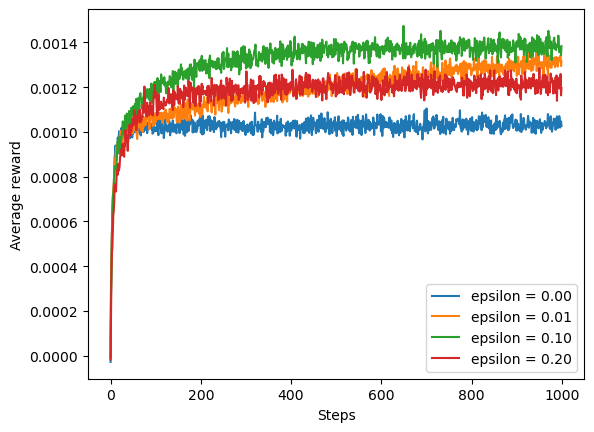

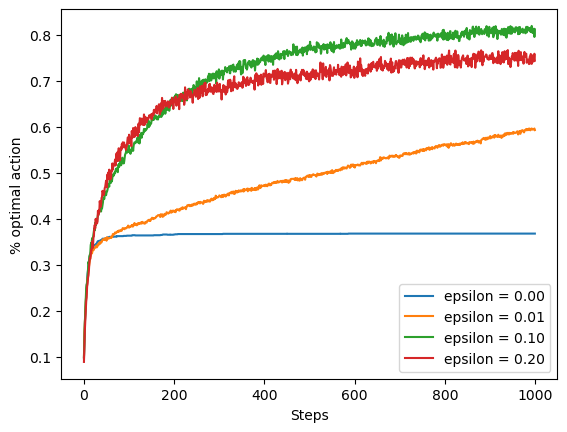

In [5]:
k_arm = 10
runs = 2000
time = 1000
epsilons = [0, 0.01, 0.1, 0.2]
bandits = [EpsilonGreedy(k_arm, epsilon = eps) for eps in epsilons]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()


* Trouver la meilleure constante epsilon pour EpsilonGreedy
* Ecrire une classe pour la stratégie UCB
* Afficher les résultats des stratégies UCB
* Trouver la meilleure constante pour UCB
* Modifier EpsilonGreedy pour s'assurer qu'elle essaie chaque bras au moins une fois
* Modifier les deux classes précédentes avec la possibilité de mettre à jour en utilisant une step_size au lieu de la moyenne
* Modifier les deux classes précédentes avec la possibilité d'initialiser les valeurs de manière optimiste

* Trouver la meilleure constante epsilon pour EpsilonGreedy


d'apres le graphe la meilleure constante epsilon pour EpsilonGreedy est 0.1


In [6]:
import numpy as np
import math


class UCB:
    def __init__(self, k_arm, c=1.0):
        self.k_arm = k_arm
        self.c = c
        self.t = 0
        self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "UCB with c= " + str(c)
    
    def reset(self):
        self.q_estimation = np.zeros(self.k_arm)
        self.action_count = np.zeros(self.k_arm)
        self.t = 0
    
    def choose_action(self):
        ucb_values = np.zeros(self.k_arm)
        for arm in range(self.k_arm):
            if self.action_count[arm] == 0:
                return arm
            else:
                bonus = self.c * math.sqrt(math.log(self.t) / self.action_count[arm])
                ucb_values[arm] = self.q_estimation[arm] + bonus
        
                return np.argmax(ucb_values)
    
    def update(self, action, reward):
        self.t += 1
        self.action_count[action] += 1
        self.q_estimation[action] += (reward - self.q_estimation[action]) / self.action_count[action]


        
k_arm = 10
runs = 2
time = 20
eps = UCB(k_arm, c = 1)
simulate([eps], k_arm, runs, time)

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 1725.34it/s]


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([[ 0.05533094, -0.18390273,  0.13526135,  0.00404472, -0.43355791,
         -0.04495985, -1.94022163, -0.69234394,  0.53538893, -0.95194283,
         -0.6306728 , -0.41756707, -0.2343606 , -0.30041146, -1.37404073,
          0.2803352 ,  0.03577884, -1.6493006 ,  0.13085158, -0.28290098]]))

100%|██████████████████████████████████████| 2000/2000 [00:09<00:00, 207.23it/s]


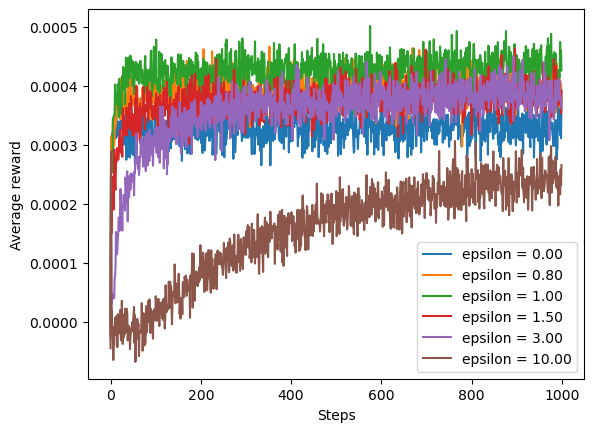

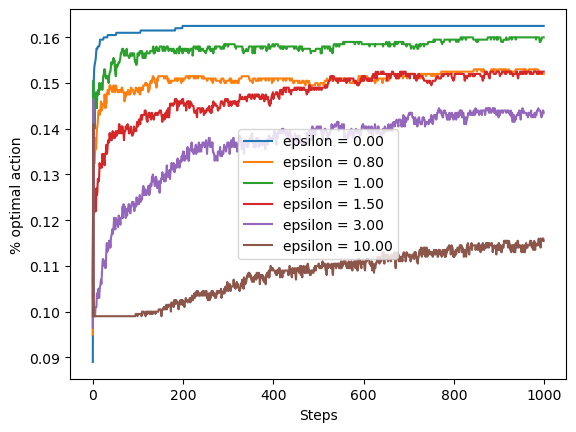

In [7]:
k_arm = 10
runs = 2000
time = 1000
constante = [0, 0.8, 1, 1.5, 3,10]
bandits = [UCB(k_arm, c = c) for c in constante]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for c, rewards in zip(constante, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (c))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for c, counts in zip(constante, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (c))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()


* Trouver la meilleure constante pour UCB


c=1 est la meilleur constante

Modifier EpsilonGreedy pour s'assurer qu'elle essaie chaque bras au moins une fois

In [9]:
class EpsilonGreedy:
    def __init__(self, k_arm, epsilon=0.1):
        self.k_arm = k_arm
        self.epsilon = epsilon
        self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "Epsilon greedy with epsilon= " + str(epsilon)
        self.all_arms_explored = False
        self.explore_phase = True
        self.arms_to_explore = list(range(k_arm))

    def reset(self):
        self.q_estimation = np.zeros(self.k_arm)
        self.action_count = np.zeros(self.k_arm)
        self.all_arms_explored = False
        self.explore_phase = True
        self.arms_to_explore = list(range(self.k_arm))

    def choose_action(self):
        if self.explore_phase:
            action = self.arms_to_explore.pop(0)
            if not self.arms_to_explore:
                self.explore_phase = False
            return action
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k_arm)
        q_best = np.max(self.q_estimation)
        return np.random.choice([action for action, q in enumerate(self.q_estimation) if q == q_best])

    def update(self, action, reward):
        self.action_count[action] += 1
        self.q_estimation[action] += 1.0 / self.action_count[action] * (reward - self.q_estimation[action])

k_arm = 10
runs = 2
time = 20
eps = EpsilonGreedy(k_arm, epsilon=0.1)
simulate([eps], k_arm, runs, time)


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 218.01it/s]


(array([[0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 1. , 1. , 1. ,
         0.5, 1. , 1. , 1. , 0.5, 1. , 1. ]]),
 array([[-0.65420968, -0.84767   ,  0.27374474,  1.41275788,  0.1478888 ,
          0.8336424 ,  0.91712864, -2.22231498, -0.23458805,  0.69648396,
          2.94861956,  1.22490003,  1.57204391,  1.72910952,  1.31933371,
          1.67848317,  1.23054421, -0.32311956,  2.26384073,  2.31559915]]))

100%|███████████████████████████████████████| 2000/2000 [00:28<00:00, 70.18it/s]


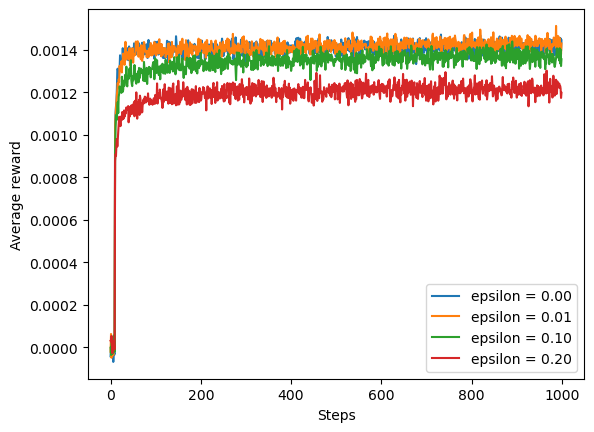

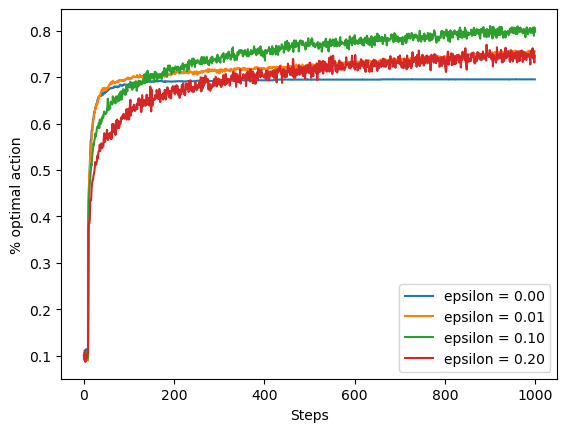

In [10]:
k_arm = 10
runs = 2000
time = 1000
epsilons = [0, 0.01, 0.1, 0.2]
bandits = [EpsilonGreedy(k_arm, epsilon = eps) for eps in epsilons]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()


Modifier les deux classes précédentes avec la possibilité de mettre à jour en utilisant une step_size au lieu de la moyenne

In [13]:
import numpy as np
import math


class UCB:
    def __init__(self, k_arm, c=1.0):
        self.k_arm = k_arm
        self.c = c
        self.t = 0
        self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "UCB with c= " + str(c)
    
    def reset(self):
        self.q_estimation = np.zeros(self.k_arm)
        self.action_count = np.zeros(self.k_arm)
        self.t = 0
    
    def choose_action(self):
        ucb_values = np.zeros(self.k_arm)
        for arm in range(self.k_arm):
            if self.action_count[arm] == 0:
                return arm 
            else:
                bonus = self.c * math.sqrt(math.log(self.t) / self.action_count[arm])
                ucb_values[arm] = self.q_estimation[arm] + bonus
        
        return np.argmax(ucb_values)
    
    def update(self, action, reward, step_size=None):
        self.t += 1
        self.action_count[action] += 1
        if step_size is None:
            step_size = 1.0 / self.action_count[action]
        self.q_estimation[action] += step_size * (reward - self.q_estimation[action])


100%|███████████████████████████████████████| 2000/2000 [00:24<00:00, 83.19it/s]


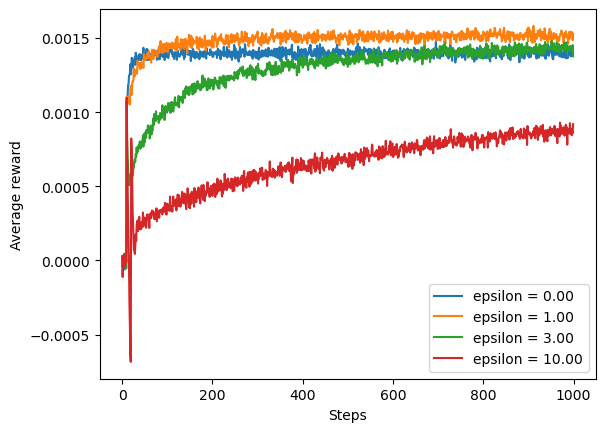

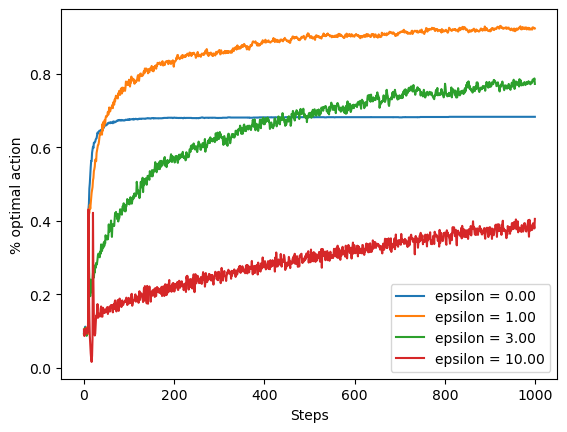

In [14]:
k_arm = 10
runs = 2000
time = 1000
constante = [0, 1, 3, 10]
bandits = [UCB(k_arm, c = c) for c in constante]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for c, rewards in zip(constante, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (c))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for c, counts in zip(constante, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (c))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

In [11]:
class EpsilonGreedy:
    def __init__(self, k_arm, epsilon=0.1):
        self.k_arm = k_arm
        self.epsilon = epsilon
        self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "Epsilon greedy with epsilon= " + str(epsilon)
        self.all_arms_explored = False
        self.explore_phase = True
        self.arms_to_explore = list(range(k_arm))

    def reset(self):
        self.q_estimation = np.zeros(self.k_arm)
        self.action_count = np.zeros(self.k_arm)
        self.all_arms_explored = False
        self.explore_phase = True
        self.arms_to_explore = list(range(self.k_arm))

    def choose_action(self):
        if self.explore_phase:
            action = self.arms_to_explore.pop(0)
            if not self.arms_to_explore:
                self.explore_phase = False
            return action
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k_arm)
        q_best = np.max(self.q_estimation)
        return np.random.choice([action for action, q in enumerate(self.q_estimation) if q == q_best])

    def update(self, action, reward, step_size=None):
        self.action_count[action] += 1
        if step_size is None:
            step_size = 1.0 / self.action_count[action]
        self.q_estimation[action] += step_size * (reward - self.q_estimation[action])



100%|███████████████████████████████████████| 2000/2000 [00:28<00:00, 68.97it/s]


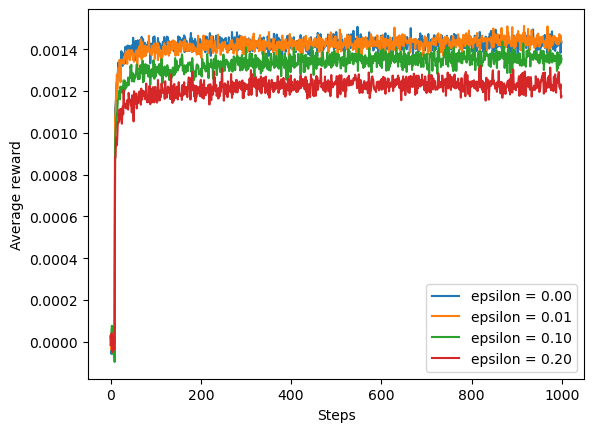

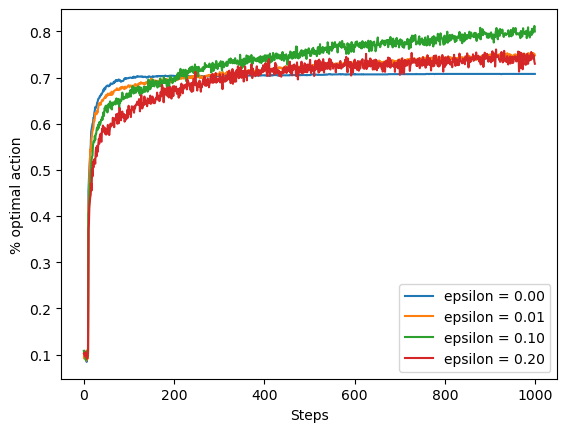

In [12]:
k_arm = 10
runs = 2000
time = 1000
epsilons = [0, 0.01, 0.1, 0.2]
bandits = [EpsilonGreedy(k_arm, epsilon = eps) for eps in epsilons]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

Modifier les deux classes précédentes avec la possibilité d'initialiser les valeurs de manière optimiste

In [19]:
class UCB:
    def __init__(self, k_arm, c=1.0, optimistic_initialization=False, initial_value=2.0):
        self.k_arm = k_arm
        self.c = c
        self.optimistic_initialization = optimistic_initialization
        if optimistic_initialization:
            self.q_estimation = np.ones(k_arm) * initial_value
        else:
            self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "UCB with c= " + str(c) + ", optimistic initialization= " + str(optimistic_initialization)
        self.t = 0
    
    def reset(self):
        if self.optimistic_initialization:
            self.q_estimation = np.ones(self.k_arm) * initial_value
        else:
            self.q_estimation = np.zeros(self.k_arm)
        self.action_count = np.zeros(self.k_arm)
        self.t = 0
    
    def choose_action(self):
        ucb_values = np.zeros(self.k_arm)
        for arm in range(self.k_arm):
            if self.action_count[arm] == 0:
                return arm
            else:
                bonus = self.c * math.sqrt(math.log(self.t) / self.action_count[arm])
                ucb_values[arm] = self.q_estimation[arm] + bonus
        
        return np.argmax(ucb_values)
    
    def update(self, action, reward, step_size=None):
        self.t += 1
        self.action_count[action] += 1
        if step_size is None:
            step_size = 1.0 / self.action_count[action]  # Default step size is 1/N
        self.q_estimation[action] += step_size * (reward - self.q_estimation[action])

100%|███████████████████████████████████████| 2000/2000 [00:23<00:00, 83.74it/s]


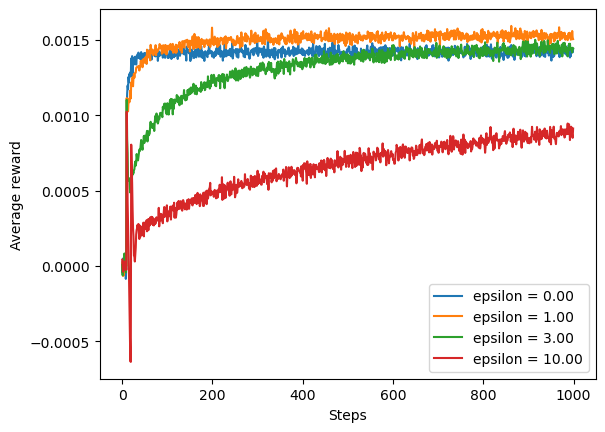

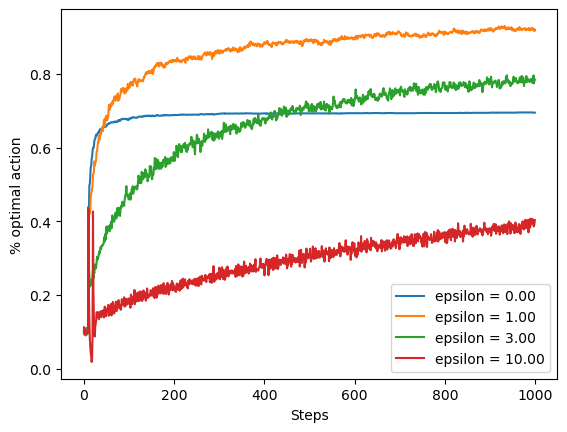

In [20]:
k_arm = 10
runs = 2000
time = 1000
constante = [0, 1, 3, 10]
bandits = [UCB(k_arm, c = c) for c in constante]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for c, rewards in zip(constante, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (c))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for c, counts in zip(constante, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (c))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

In [17]:
class EpsilonGreedy:
    def __init__(self, k_arm, epsilon=0.1, optimistic_initialization=False, initial_value=2.0):
        self.k_arm = k_arm
        self.epsilon = epsilon
        self.optimistic_initialization = optimistic_initialization
        if optimistic_initialization:
            self.q_estimation = np.ones(k_arm) * initial_value
        else:
            self.q_estimation = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.name = "Epsilon greedy with epsilon= " + str(epsilon) + ", optimistic initialization= " + str(optimistic_initialization)
        self.all_arms_explored = False
        self.explore_phase = True
        self.arms_to_explore = list(range(k_arm))

    def reset(self):
        if self.optimistic_initialization:
            self.q_estimation = np.ones(self.k_arm) * initial_value
        else:
            self.q_estimation = np.zeros(self.k_arm)
        self.action_count = np.zeros(self.k_arm)
        self.all_arms_explored = False
        self.explore_phase = True
        self.arms_to_explore = list(range(self.k_arm))

    def choose_action(self):
        if self.explore_phase:
            action = self.arms_to_explore.pop(0)
            if not self.arms_to_explore:
                self.explore_phase = False
            return action
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k_arm)
        q_best = np.max(self.q_estimation)
        return np.random.choice([action for action, q in enumerate(self.q_estimation) if q == q_best])

    def update(self, action, reward, step_size=None):
        self.action_count[action] += 1
        if step_size is None:
            step_size = 1.0 / self.action_count[action]  # Default step size is 1/N
        self.q_estimation[action] += step_size * (reward - self.q_estimation[action])

100%|███████████████████████████████████████| 2000/2000 [00:28<00:00, 71.07it/s]


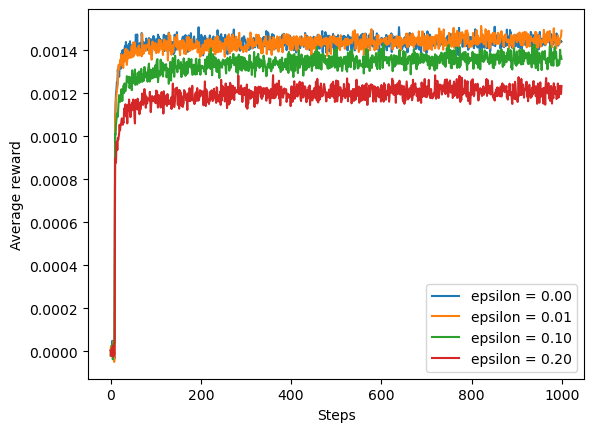

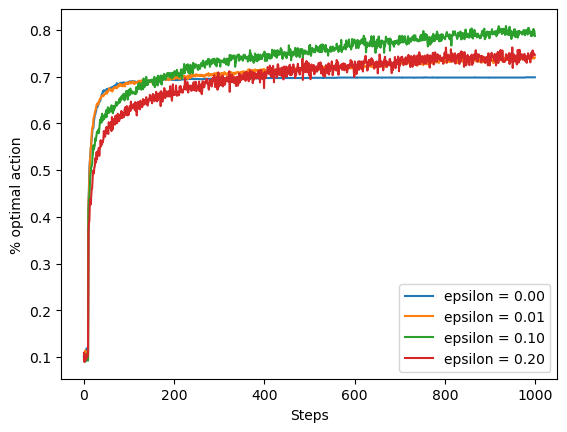

In [18]:
k_arm = 10
runs = 2000
time = 1000
epsilons = [0, 0.01, 0.1, 0.2]
bandits = [EpsilonGreedy(k_arm, epsilon = eps) for eps in epsilons]
best_action_counts,rewards = simulate(bandits, k_arm, runs, time)

for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards / time, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='epsilon = %.02f' % (eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()